# Zadanie 1
*Regresja liniowa*

1. Weryfikacja poprawności danych

In [1]:
import pandas as pd

df = pd.read_csv('Walmart.csv')

# Sprawdzenie rozmiaru DataFrame
print(df.shape)

# Wyświetlenie pierwszych 5 wierszy
print(df.head)

# Sprawdzenie typów kolumn
print(df.dtypes)

(6435, 8)
<bound method NDFrame.head of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   


2. Sprawdzenie, jakie kolumny zawiera zbiór, jakie są ich typy oraz jakie statystyki opisowe
generuje metoda.

In [26]:
# Nazwy kolumn
print(df.columns)

# Typy kolumn
print(df.dtypes)

# Statystyki opisowe
print(df.describe())

Index(['Store', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Holiday_Flag_0', 'Holiday_Flag_1'],
      dtype='object')
Store             category
Date               float64
Weekly_Sales       float64
Temperature        float64
Fuel_Price         float64
CPI                float64
Unemployment       float64
Holiday_Flag_0        bool
Holiday_Flag_1        bool
dtype: object
         Date  Weekly_Sales  Temperature   Fuel_Price          CPI  \
count  6435.0  6.435000e+03  6435.000000  6435.000000  6435.000000   
mean      0.0  1.046965e+06    60.663782     3.358607   171.578394   
std       0.0  5.643666e+05    18.444933     0.459020    39.356712   
min       0.0  2.099862e+05    -2.060000     2.472000   126.064000   
25%       0.0  5.533501e+05    47.460000     2.933000   131.735000   
50%       0.0  9.607460e+05    62.670000     3.445000   182.616521   
75%       0.0  1.420159e+06    74.940000     3.735000   212.743293   
max       0.0  3.818686e+

3. Brakujące dane i uzupełnienie ich metodą imputacji.

In [11]:
# Identyfikacja brakujących wartości
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [10]:
from sklearn.impute import SimpleImputer

# Tworzenie imputerów dla zmiennych nymerycznych i kategorycznych
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

#Imputacja dla zmiennych numerycznych
df[['Unemployment']] = imputer_num.fit_transform(df[['Unemployment']])

# Imputacja dla zmiennych kategorycznych
df[['Date']] = imputer_cat.fit_transform(df[['Date']])

4. Wykrycie i usunięcie ewentualnych duplikatów oraz zbadanie, czy występują ekstremalne wartości,
które mogą zniekształcić model. Sporządzono wykresy.

In [12]:
# Usunięcie zduplikowanych wierszy
df = df.drop_duplicates()

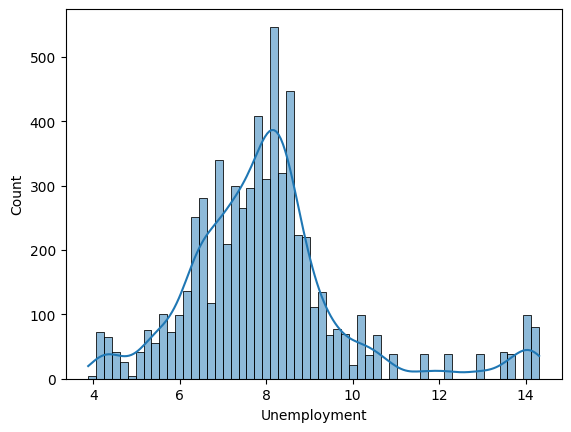

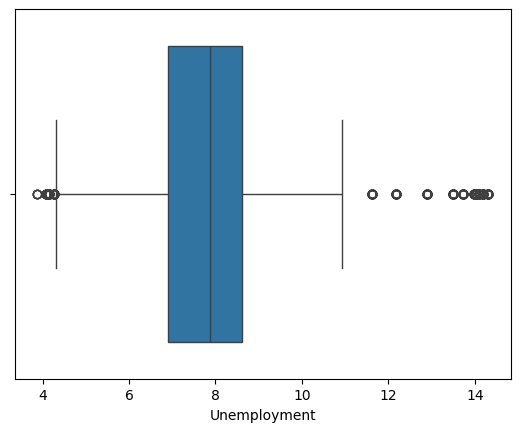

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram dla zmiennej numerycznej
sns.histplot(df['Unemployment'], kde=True)
plt.show()

# Boxplot dla zmiennej numerycznej
sns.boxplot(x=df['Unemployment'])
plt.show()

5. Obliczono macierz korelacji i przedstawiono ją jako heatmapę, aby ocenić, które zmienne
silnie współzależne ze sobą mogą wpłynąć na model.

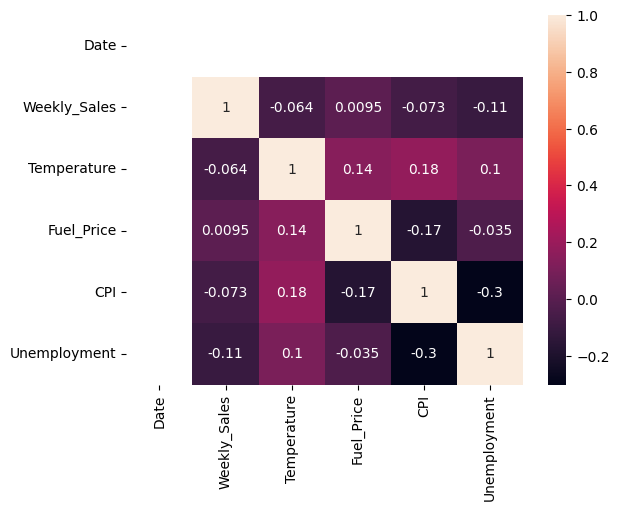

In [24]:
import numpy as np
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Date'] = df['Date'].astype(int) / 10**9

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Macierz korelacji
corr_matrix = numeric_df.corr()

# Wizualizacja macierzy korelacji jako heatmapy
sns.heatmap(corr_matrix, annot=True)
plt.show()

6. Przekonwertowano kolumny z datami do typu datetime (w punkcie 5) oraz kolumny kategoryczne do
typu category.

In [23]:
# Konwersja kolumny kategorycznej na typ category
df['Store'] = df['Store'].astype('category')
df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')

# Sprawdzanie wyników
print(df.dtypes)
print(df)

KeyError: 'Holiday_Flag'

7. Zastosowano metody kodowania: one-hot encoding lub label encoding dla kolumn kategorycznych. Wykonaj normalizację danych.

In [22]:
# One-hot encoding dla kolumny Holiday_Flag
# df = pd.get_dummies(df, columns=['Holiday_Flag'])

# Label encoding dla kolumny Store
# df['Store'] = df['Store'].cat.codes

# Normalizacja danych
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df[['Temperature', 'Fuel_Price', 'Unemployment', 'CPI']] = scaler.fit_transform(df[['Temperature', 'Fuel_Price', 'Unemployment', 'CPI']])
# print(df.head())

KeyError: "None of [Index(['Holiday_Flag'], dtype='object')] are in the [columns]"

Świeci się błąd, ponieważ kolumna Holiday_Flag została już roznita na dwie kolumny, co się wiążę z nieistnieniem tej kolumny w zbiorze.



8. Ustalono kolumnę Weekly_Sales na kolumnę docelową. Pozostałe kolumny posłużą jako
cechy.

In [27]:
# Zmienna docelowa
y = df['Weekly_Sales']

# Cechy
x = df.drop(columns = ['Weekly_Sales'])

9. Użyto funkcji train_test_split ze scikit-learn, aby podzielić dane (np. w proporcji 80/20
lub 70/30) i ustalono stały random_state dla powtarzalności wyników.

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

10. Zainicjalizowano model regresji liniowej, np. przy użyciu LinearRegression ze scikit-learn. Wytrenuowano model na danych treningowych, używając metody .fit().

In [29]:
from sklearn.linear_model import LinearRegression

# Inicjalizacja modelu
model = LinearRegression()

# Trenowanie modelu
model.fit(x_train, y_train)

LinearRegression()

11. Użyto wytrenowanego modelu, aby przewidzieć wartości sprzedaży na zbiorze
testowym lub walidacyjnym.

In [31]:
# Predykcja na zbiorze testowym
y_pred = model.predict(x_test)

# print(y_pred)

[1196174.80018843 1096306.76027313 1261762.99266103 ...  689643.21716126
 1264055.28452667 1288523.22805756]


12. Oceniono jakość modelu przy użyciu metryk takich jak: Mean Squared Error (MSE), Root
Mean Squared Error (RMSE), R² (współczynnik determinacji).

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

# Obliczenie MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Obliczenie RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Obliczenie R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

Mean Squared Error: 274455221280.66055
Root Mean Squared Error: 523884.74045410077
R^2: 0.1480635340595079


13. Zastosowano technikę kroswalidacji (np. k-fold cross-validation), aby upewnić się, że
model nie jest przeuczony i jego wyniki są stabilne.

In [36]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # KFold z 5 podziałami
cv_scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')

# Konwersja wyników do wartości pozytywnych, ponieważ cross_val_score zwraca ujemne MSE
cv_scores = -cv_scores

# Wyniki
print(f"Cross-validation MSE scores for each fold: {cv_scores}")
print(f"Mean MSE across all folds: {np.mean(cv_scores)}")
print(f"Standard deviation of MSE: {np.std(cv_scores)}")

Cross-validation MSE scores for each fold: [2.74455221e+11 2.67685141e+11 2.81131079e+11 2.71818843e+11
 2.74316196e+11]
Mean MSE across all folds: 273881296052.5309
Standard deviation of MSE: 4375475274.425631


14. Dokonano analizy, które cechy mają największy wpływ na sprzedaż – sprawdź
współczynniki regresji.

In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Zakładając, że masz dane X (cechy) i y (target - sprzedaż)
# X - cechy, y - sprzedaż

# Podział danych na cechy i target
X = df.drop(columns=['Weekly_Sales'])  # Zmienne wejściowe (wszystkie kolumny oprócz 'Weekly_Sales')
y = df['Weekly_Sales']  # Target (sprzedaż)

# Opcjonalnie: Standaryzacja danych (w przypadku, gdy cechy mają różne jednostki)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na dane treningowe i testowe (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicjalizacja i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Współczynniki regresji
coefficients = model.coef_

# Tworzenie DataFrame z cechami i ich współczynnikami
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sortowanie cech na podstawie wartości bezwzględnej współczynnika (aby zobaczyć, które cechy mają największy wpływ)
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Wyświetlenie wyników
print(feature_importance)

          Feature    Coefficient  Abs_Coefficient
0           Store -195841.500136    195841.500136
4             CPI  -91231.605847     91231.605847
5    Unemployment  -45960.015084     45960.015084
2     Temperature  -14051.860856     14051.860856
6  Holiday_Flag_0   -9732.147573      9732.147573
7  Holiday_Flag_1    9732.147573      9732.147573
3      Fuel_Price   -2136.465544      2136.465544
1            Date       0.000000         0.000000


# Zadanie 2
*Prognozowanie sprzedaży z użyciem regresji Lasso:*

a) usuń obserwację z brakującymi wartościami

In [38]:
# Usuń obserwacje z brakującymi wartościami
df = df.dropna()

print(df.isnull().sum())

Store             0
Date              0
Weekly_Sales      0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
Holiday_Flag_0    0
Holiday_Flag_1    0
dtype: int64


b) upewnij się, że kolumny z datą są przekonwertowane na typ datetime oraz, że
zmienne kategoryczne mają odpowiedni typ.

In [44]:
# Konwersja kolumny Date do typu datetime z obsługą błędów
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y', errors='coerce')

# Konwersja zmiennych kategorycznych na typ 'category'
df['Store'] = df['Store'].astype('category')
df['Holiday_Flag_0'] = df['Holiday_Flag_0'].astype('category')

# Sprawdzenie typów danych
print(df.dtypes)

Store                   category
Date              datetime64[ns]
Weekly_Sales             float64
Temperature              float64
Fuel_Price               float64
CPI                      float64
Unemployment             float64
Holiday_Flag_0          category
Holiday_Flag_1              bool
dtype: object


c) zastosuj one-hot encoding, aby zamienić zmienne kategoryczne na postać numeryczną

In [45]:
# Zastosowanie one-hot encoding dla zmiennych kategorycznych
df = pd.get_dummies(df, columns=['Holiday_Flag_0', 'Store'], drop_first=True)

# Podgląd danych po one-hot encoding
print(df.head())


  Date  Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
0  NaT    1643690.90        42.31       2.572  211.096358         8.106   
1  NaT    1641957.44        38.51       2.548  211.242170         8.106   
2  NaT    1611968.17        39.93       2.514  211.289143         8.106   
3  NaT    1409727.59        46.63       2.561  211.319643         8.106   
4  NaT    1554806.68        46.50       2.625  211.350143         8.106   

   Holiday_Flag_1  Holiday_Flag_0_True  Store_1  Store_2  ...  Store_35  \
0           False                 True    False    False  ...     False   
1            True                False    False    False  ...     False   
2           False                 True    False    False  ...     False   
3           False                 True    False    False  ...     False   
4           False                 True    False    False  ...     False   

   Store_36  Store_37  Store_38  Store_39  Store_40  Store_41  Store_42  \
0     False     False  

d) wykonaj standaryzację cech za pomocą StandardScaler (wyklucz kolumnę z datą)

In [46]:
from sklearn.preprocessing import StandardScaler

# Wykluczenie kolumny z datą
X = df.drop(columns=['Date', 'Weekly_Sales'])
y = df['Weekly_Sales']

# Standaryzacja cech (poza kolumną 'Date')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sprawdzenie wyników
print(X_scaled[:5])

[[-0.99513556 -1.71379998  1.00417522  0.05696366 -0.27420425  0.27420425
  -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567
  -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567
  -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567
  -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567
  -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567
  -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567
  -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567
  -0.15075567 -0.15075567]
 [-1.20117022 -1.76608938  1.00788038  0.05696366  3.64691651 -3.64691651
  -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567
  -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567
  -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567
  -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567 -0.15075567
  -0.150755

e) podziel dane na zbiór treningowy i walidacyjny (np. 70/30)

In [47]:
from sklearn.model_selection import train_test_split

# Podział danych na zbiór treningowy i walidacyjny (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Podgląd wymiarów zbiorów
print(f"Treningowy zbiór cech: {X_train.shape}")
print(f"Walidacyjny zbiór cech: {X_test.shape}")

Treningowy zbiór cech: (4504, 50)
Walidacyjny zbiór cech: (1931, 50)


f) użyj funkcji LassoCV, która wykonuje kroswalidację, aby znaleźć optymalną wartość parametru alfa

In [48]:
from sklearn.linear_model import LassoCV

# Użycie LassoCV do znalezienia optymalnej wartości parametru alpha
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Optymalna wartość alpha
print(f"Optymalna wartość alpha: {lasso.alpha_}")

Optymalna wartość alpha: 165.6402849185534


g) Wytrenuj model na zbiorze treningowym

Model jest **już wytrenowany** przez funkcję fit() w punkcie f.

h) użyj wytrenowanego modelu do przewidzenia wartości sprzedaży na zbiorze walidacyjnym

In [49]:
# Predykcja na zbiorze walidacyjnym
y_pred = lasso.predict(X_test)

# Podgląd pierwszych przewidywanych wyników
print(y_pred[:5])

[1102821.41496564 1336045.58259449 1926474.80616304 1005895.94659568
  371529.7490105 ]


i) oblicz MSE, RMSE oraz R², aby ocenić jakość modelu

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Obliczenie MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE to pierwiastek kwadratowy z MSE
r2 = r2_score(y_test, y_pred)

# Wyniki
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 26719788814.788353
RMSE: 163461.8879579835
R²: 0.9164277019219018
